--- Iniciando Geração do Gráfico Comparativo ---

Dados formatados (melted) para o gráfico:
| Pipeline           | Métrica   | Score   |
|:-------------------|:----------|:--------|
| KNN_SMOTE          | F1-Macro  | 0.71    |
| KNN_ADASYN         | F1-Macro  | 0.7     |
| KNN_RUS            | F1-Macro  | 0.7     |
| KNN_SMOTEENN       | F1-Macro  | 0.67    |
| DecisionTree_SMOTE | F1-Macro  | 0.7     |

Gerando o gráfico...

--- Sucesso! ---
Gráfico salvo como 'comparacao_pipelines.png'.
Agora você pode carregar este arquivo .png no seu projeto LaTeX.


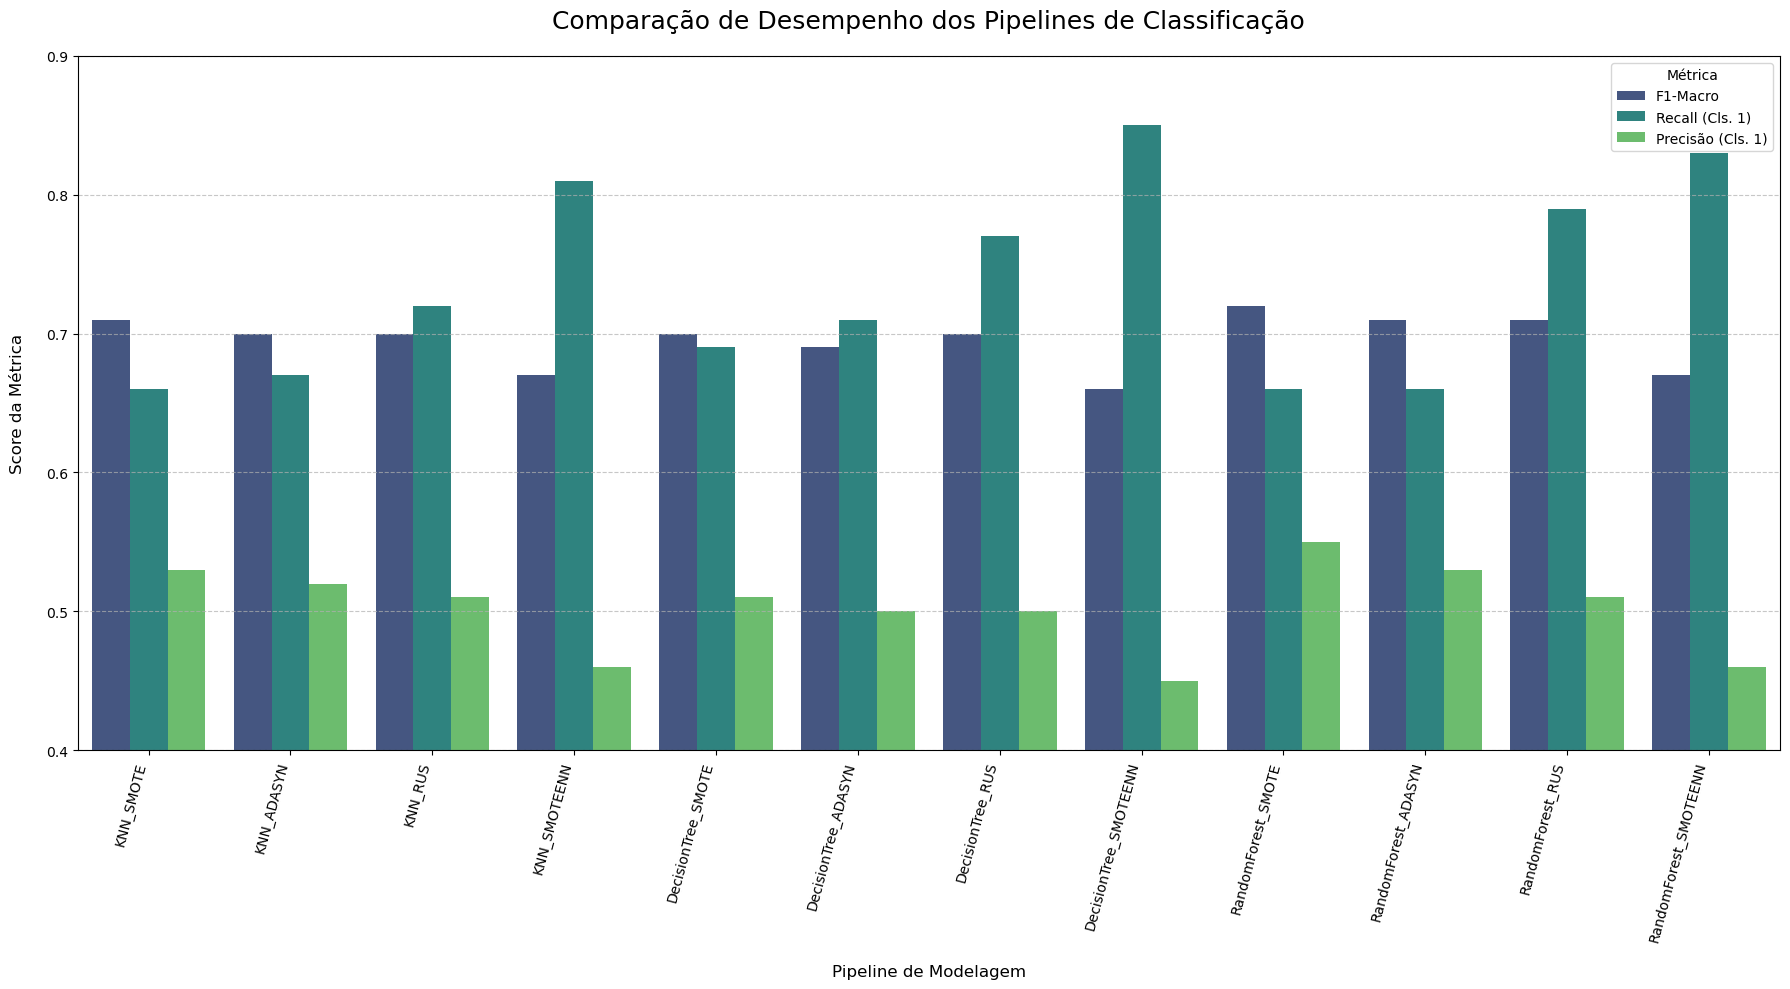

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Iniciando Geração do Gráfico Comparativo ---")

df = pd.read_csv('arquivos_csv/resultados_para_grafico.csv')

df['Pipeline'] = df['Modelo'] + '_' + df['Balanceador']

# Reformatar o DataFrame (de "largo" para "longo")
# Isso é necessário para o Seaborn criar barras agrupadas
melted_df = df.melt(
    id_vars=['Pipeline'], 
    value_vars=['F1-Macro', 'Recall (Cls. 1)', 'Precisão (Cls. 1)'], 
    var_name='Métrica',  # Nova coluna para "F1-Macro", "Recall", etc.
    value_name='Score'   # Nova coluna para os valores (0.72, 0.66, etc.)
)

print("\nDados formatados (melted) para o gráfico:")
print(melted_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# 3. Criar o Gráfico com Seaborn
print("\nGerando o gráfico...")

# Definir o tamanho da figura (largura, altura)
plt.figure(figsize=(18, 10))

# Criar o gráfico de barras agrupado
# x = Pipeline (no eixo X)
# y = Score (no eixo Y)
# hue = Métrica (as cores e grupos)
barplot = sns.barplot(
    data=melted_df,
    x='Pipeline',
    y='Score',
    hue='Métrica',
    palette='viridis' # Esquema de cores
)

# 4. Customizar e Limpar o Gráfico (Boa prática para artigos)

# Adicionar título
plt.title('Comparação de Desempenho dos Pipelines de Classificação', fontsize=18, pad=20)

# Rotacionar os rótulos do eixo X para não sobrepor
plt.xticks(rotation=75, ha='right')

# Ajustar o eixo Y para "dar zoom" (todos os scores estão acima de 0.4)
plt.ylim(0.4, 0.9)

# Adicionar rótulos
plt.xlabel('Pipeline de Modelagem', fontsize=12, labelpad=15)
plt.ylabel('Score da Métrica', fontsize=12, labelpad=15)

# Adicionar linhas de grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Otimizar o layout para caber tudo
plt.tight_layout()

# 5. Salvar o Gráfico
output_filename = 'Artefatos/comparacao_pipelines.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f"\n--- Sucesso! ---")
print(f"Gráfico salvo como '{output_filename}'.")
print("Agora você pode carregar este arquivo .png no seu projeto LaTeX.")